In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from time import sleep
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import re
import string
from sklearn.metrics  import f1_score, accuracy_score
from sklearn.metrics import  confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.model_selection import cross_validate
from scipy import interp
from sklearn.metrics import roc_curve, auc 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1 Загрузка датасета

Загрузите и прочитайте в pandas следующий датасет. Обратите внимание, что датасет собран «криво», поэтому прежде чем он «правильно» загрузится (рис.1), необходимо его обработать.

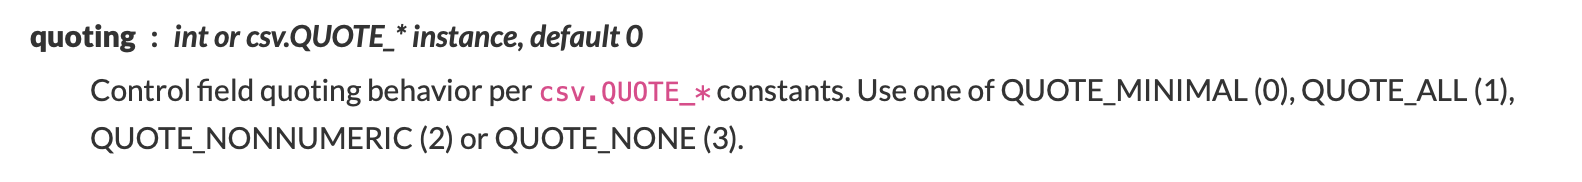

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/cars.csv', encoding='Windows-1252')
data

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000.0,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435,2016-04-07 03:16:57;;;;;;;;
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000.0,5,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954,2016-04-07 01:46:50;;;;;;;;
2,"2016-03-14 12:52:21,Jeep_Grand_Cherokee_""Overl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000.0,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074,2016-03-17 17:40:17;;;;;;;;
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000.0,7,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437,2016-04-06 10:17:21;;;;;;;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371819,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000.0,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0.0,39576,2016-04-06 00:46:52;;;;;;;;
371820,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000.0,3,benzin,smart,nein,2016-03-05 00:00:00,0.0,26135,2016-03-11 18:17:12;;;;;;;;
371821,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000.0,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0.0,87439,2016-04-07 07:15:26;;;;;;;;
371822,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000.0,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0.0,40764,2016-03-24 12:45:21;;;;;;;;


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/cars.csv', encoding='Windows-1252', quoting=csv.QUOTE_NONE)
data = data.rename(columns={'lastSeen;;;;;;;;': 'lastSeen'})
data['dateCrawled'] = data['dateCrawled'].str.strip('"')
data['lastSeen'] = data['lastSeen'].str.rstrip(';')
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""""Overland""""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,"2016-04-05 12:47:46"""
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


# 2 Описательная статистика

Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.

Общие характеристики

In [ ]:
data.shape

(371824, 20)

In [ ]:
data.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [ ]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.718240e+05,371824.000000,371824.000000,371824.000000,371824.000000,371824.0,371824.000000
mean,1.728630e+04,2004.576714,115.541356,125618.626017,5.734511,0.0,50821.714650
std,3.586525e+06,92.829866,192.072300,40111.586155,3.712442,0.0,25798.800245
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [ ]:
data.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37899
yearOfRegistration         0
gearbox                20223
powerPS                    0
model                  20498
kilometer                  0
monthOfRegistration        0
fuelType               33415
brand                      0
notRepairedDamage      72124
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [ ]:
data.nunique()

dateCrawled            280652
name                   233704
seller                      2
offerType                   2
price                    5597
abtest                      2
vehicleType                 8
yearOfRegistration        155
gearbox                     2
powerPS                   794
model                     251
kilometer                  13
monthOfRegistration        13
fuelType                    7
brand                      40
notRepairedDamage           2
dateCreated               114
nrOfPictures                1
postalCode               8151
lastSeen               184653
dtype: int64

In [ ]:
data.describe(include='object')  #freq Частота наиболее частого значения

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
count,371824,371824,371824,371824,371824,333925,351601,351326,338409,371824,299700,371824,371824
unique,280652,233704,2,2,2,8,2,251,7,40,2,114,184653
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,test,limousine,manuell,golf,benzin,volkswagen,nein,2016-04-03 00:00:00,2016-04-06 13:45:54
freq,7,657,371821,371812,192733,95963,274432,30086,224038,79695,263390,14470,17


# 3 Cтолбец Price

Поработайте со столбцом price. Постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению.

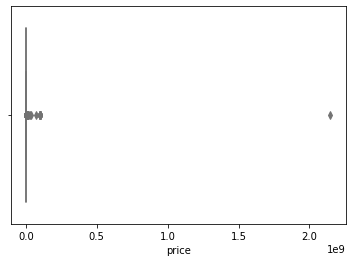

In [ ]:
sns.boxplot(data['price'], palette='rainbow')

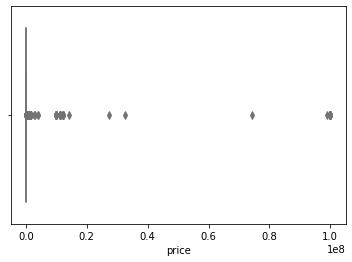

In [ ]:
maxi = max(data['price'])
data_plot = data.loc[data['price'] < maxi]
sns.boxplot(data_plot['price'], palette='rainbow')

In [ ]:
mid_50 = data['price'].quantile([.25, .75])
price_25, price_75 = mid_50.iloc[0], mid_50.iloc[1]

iqr = price_75 - price_25
low = price_25 - 1.5 * iqr
high = price_75 + 1.5 * iqr

low, iqr, high

(-7925.0, 6050.0, 16275.0)

In [ ]:
data = data.loc[data['price'] < high]
print('Count: ', data.shape[0], '\nMin price: ', data['price'].min(), '\nMax price:', data['price'].max())

Count:  343696 
Min price:  0 
Max price: 16270


In [ ]:
data.shape

(343696, 20)

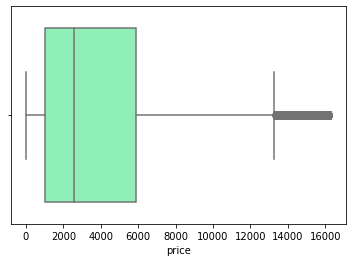

In [ ]:
sns.boxplot(data['price'], palette='rainbow')

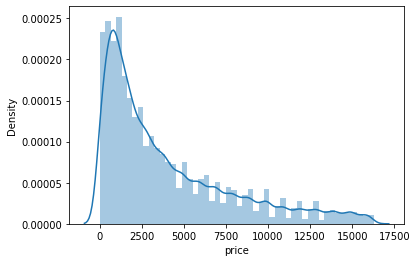

In [ ]:
sns.distplot(data['price'])

Нормализация Price

In [ ]:
prices = data['price']
normalized_prices = (prices-prices.min())/(prices.max()-prices.min())
data['price'] = normalized_prices

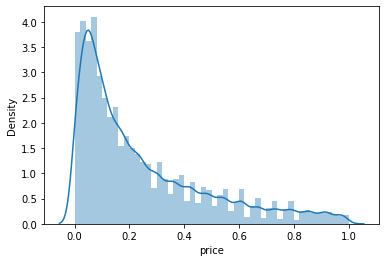

In [ ]:
sns.distplot(data['price'])

# 5 работа с другими переменными

Аналогично поработайте и с другими «важными для целевой функции price» параметрами (powerPS, yearOfRegistration, kilometer и т.д). «Важность» докажите через коэффициент корреляции. Сделайте визуализацию.

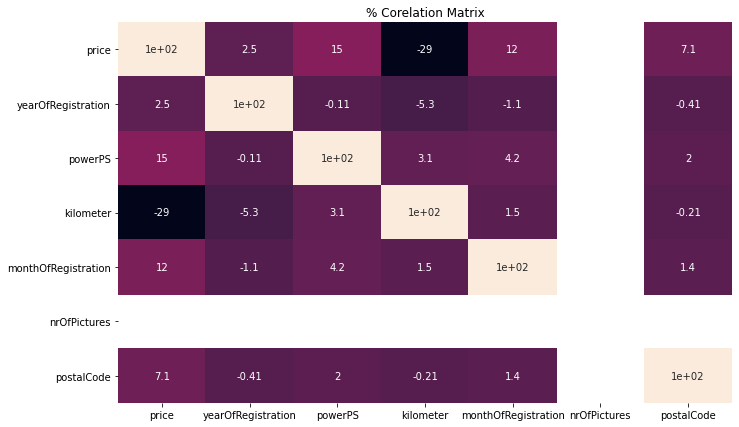

In [ ]:
plt.figure(figsize=(11,7)) 
sns.heatmap(cbar=False, annot=True, data=data.corr()*100) 
plt.title('% Corelation Matrix') 
plt.show()

In [ ]:
data['powerPS'].describe()

count    343529.000000
mean        107.769423
std         191.551607
min           0.000000
25%          68.000000
50%         102.000000
75%         140.000000
max       20000.000000
Name: powerPS, dtype: float64

In [ ]:
mid_50 = data['powerPS'].quantile([.25, .75])
price_25, price_75 = mid_50.iloc[0], mid_50.iloc[1]

iqr = price_75 - price_25
low = price_25 - 1.5 * iqr
high = price_75 + 1.5 * iqr

low, iqr, high

(-40.0, 72.0, 248.0)

In [ ]:
data = data.loc[data['powerPS'] < high]

In [ ]:
ps = data['powerPS']
normalized_ps = (ps-ps.min())/(ps.max()-ps.min())
data['powerPS'] = normalized_ps

In [ ]:
data['powerPS'].describe()

count    336840.000000
mean        100.452669
std          55.642809
min           0.000000
25%          65.000000
50%         101.000000
75%         140.000000
max         247.000000
Name: powerPS, dtype: float64

kilometer

In [ ]:
data['kilometer'].describe()

count    336840.000000
mean     129362.931956
std       36944.233243
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

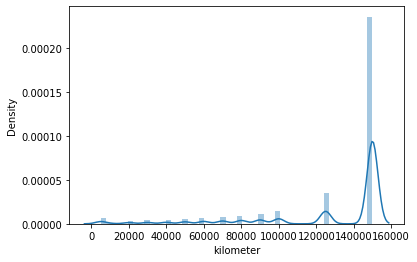

In [ ]:
sns.distplot(data['kilometer'])

In [ ]:
kms = data['kilometer']
normalized_kms = (kms-kms.min())/(kms.max()-kms.min())
data['kilometer'] = normalized_kms

In [ ]:
data.shape

(336840, 20)

# 6 boxplots

Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?

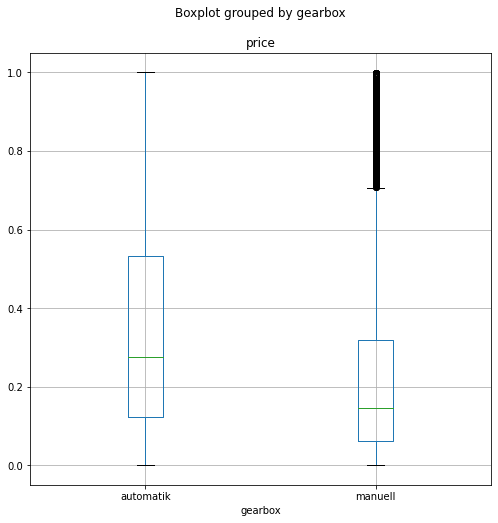

In [ ]:
data.boxplot(by ='gearbox', column =['price'], figsize=(8, 8))

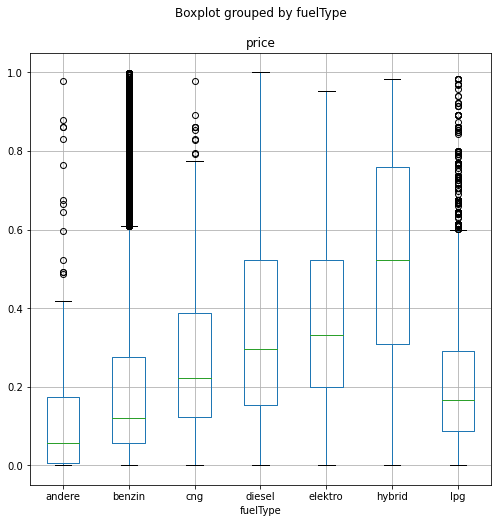

In [ ]:
data.boxplot(by ='fuelType', column =['price'], figsize=(8, 8))

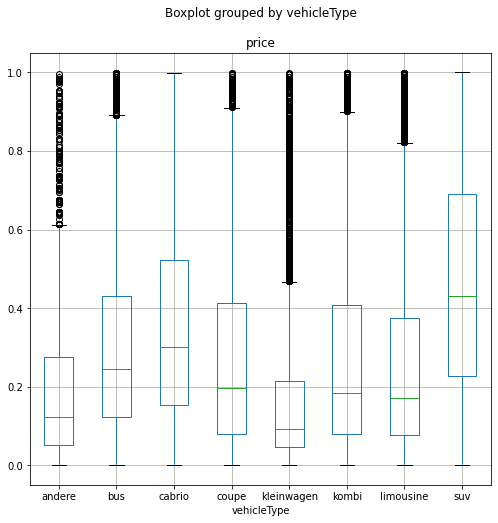

In [ ]:
data.boxplot(by ='vehicleType', column =['price'], figsize=(8, 8))

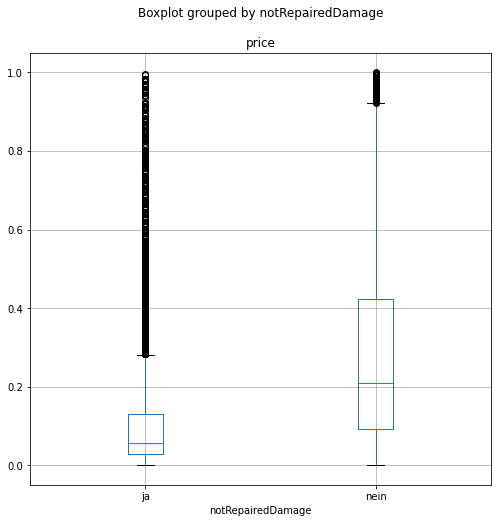

In [ ]:
data.boxplot(by ='notRepairedDamage', column =['price'], figsize=(8, 8))

# 7 Работа с пропущенными значениями

Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения.

In [ ]:
#сохраним датасет без удаления пропусков для доп задания
data_nof = data
data_nof.shape

(336840, 20)

In [ ]:
# удаляем константные поля
data.drop(['seller'], axis=1, inplace=True)
data.drop(['offerType'], axis=1, inplace=True)
data.drop('nrOfPictures', axis=1, inplace=True) 

# Много пропусков
data.drop('notRepairedDamage', axis=1, inplace=True)

# слишком сырая и неструктурированная информация
data.drop('name', axis=1, inplace=True)

In [ ]:
data = data[data.powerPS != 0]
data.dropna(subset=['powerPS'],axis=0, how='any', thresh=None, inplace=True)
data.shape

(297018, 15)

Пропуски будут заполнены для столбцов:
*   vehicleType
*   gearbox
*   fuelType


In [ ]:
data['vehicleType'].value_counts().sort_values()

andere         2550
suv            8879
coupe         12875
cabrio        17342
bus           25481
kombi         57496
kleinwagen    71094
limousine     79114
Name: vehicleType, dtype: int64

In [ ]:
data['vehicleType'] = data['vehicleType'].fillna('other')
data['vehicleType'].isnull().sum()

0

In [ ]:
data['fuelType'].value_counts().sort_values()

elektro        71
andere         98
hybrid        183
cng           502
lpg          4343
diesel      84143
benzin     187142
Name: fuelType, dtype: int64

In [ ]:
data['fuelType'] = data['fuelType'].fillna('benzin')
data['fuelType'].isnull().sum()

0

In [ ]:
data['gearbox'].value_counts().sort_values()

automatik     51747
manuell      238928
Name: gearbox, dtype: int64

In [ ]:
data['gearbox'] = data['gearbox'].fillna('manuell')
data['gearbox'].isnull().sum()

0

# 8 Сохранение и вывод df

In [ ]:
#data.to_csv('cars_preprocessed.csv')

In [ ]:
data

,dateCrawled,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
2,2016-03-14 12:52:21,0.602336,test,suv,2004,automatik,163,grand,0.827586,8,diesel,jeep,2016-03-14 00:00:00,90480,"2016-04-05 12:47:46"""
3,2016-03-17 16:54:04,0.092194,test,kleinwagen,2001,manuell,75,golf,1.000000,6,benzin,volkswagen,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,0.221266,test,kleinwagen,2008,manuell,69,fabia,0.586207,7,diesel,skoda,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,0.039951,test,limousine,1995,manuell,102,3er,1.000000,10,benzin,bmw,2016-04-04 00:00:00,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,0.135218,test,cabrio,2004,manuell,109,2_reihe,1.000000,8,benzin,peugeot,2016-04-01 00:00:00,67112,2016-04-05 18:18:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371815,2016-03-09 13:37:43,0.322680,control,other,2016,automatik,150,159,1.000000,12,benzin,alfa_romeo,2016-03-09 00:00:00,51371,2016-03-13 01:44:13
371816,2016-03-19 19:53:49,0.196681,control,limousine,2004,manuell,225,leon,1.000000,5,benzin,seat,2016-03-19 00:00:00,96465,2016-03-19 20:44:43
371820,2016-03-05 19:56:21,0.073694,test,cabrio,2000,automatik,101,fortwo,0.827586,3,benzin,smart,2016-03-05 00:00:00,26135,2016-03-11 18:17:12
371821,2016-03-19 18:57:12,0.565458,test,bus,1996,manuell,102,transporter,1.000000,3,diesel,volkswagen,2016-03-19 00:00:00,87439,2016-04-07 07:15:26


# 9 Построение моделей

In [ ]:
le = LabelEncoder()
data['abtest'] = le.fit_transform(data['abtest'])
data['vehicleType'] = le.fit_transform(data['vehicleType'])
data['gearbox'] = le.fit_transform(data['gearbox'])

In [ ]:
y = data['price']
X = data[['abtest','vehicleType','gearbox','yearOfRegistration','powerPS','kilometer','monthOfRegistration']]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=54)

In [ ]:
lr = LinearRegression()
lr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.score(test_X, test_y)

0.4857836203921148

In [ ]:
y = data['abtest']
X = data[['vehicleType','gearbox','yearOfRegistration','powerPS','kilometer','monthOfRegistration']]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=54)

In [ ]:
lr = LogisticRegression()
lr.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(test_X, test_y)

0.5191569591273315

# Контрольные вопросы

1.	Какие основные проблемы в датасете из лабораторной вы обнаружили?


Использование кавычек и других посторонних символов в случайных позициях, неправильно заполненные значения, пропуски


2.	Каковы основные методы заполнения пропущенных значений в данных?


Заполнение средним по выборке, средним по ближайшим, заполнение самым часто встречающимся значением (для категориальных), а также заполнение новым значением (др) или нулём

3.	Какие существуют методы обнаружения аномальных значений в числовых признаках?


Квантиль и межквантильный размах (на графике - ящик с усами)

# Доп задание

In [ ]:
data_nof = data_nof.dropna(subset=['powerPS', 'vehicleType', 'gearbox', 'fuelType'],axis=0)
data_nof.shape

(277430, 15)

In [ ]:
le = LabelEncoder()
data_nof['abtest'] = le.fit_transform(data_nof['abtest'])
data_nof['vehicleType'] = le.fit_transform(data_nof['vehicleType'])
data_nof['gearbox'] = le.fit_transform(data_nof['gearbox'])

y = data_nof['price']
X = data_nof[['abtest','vehicleType','gearbox','yearOfRegistration','powerPS','kilometer','monthOfRegistration']]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=54)

lr = LinearRegression()
lr.fit(train_X, train_y)

lr.score(test_X, test_y)

0.4963182431432883